In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.columns

Index(['ID', 'Stock', 'Date', 'Open', 'High', 'Low', 'Close', 'holiday',
       'unpredictability_score'],
      dtype='object')

In [4]:
df.head

<bound method NDFrame.head of              ID  Stock        Date      Open      High       Low     Close  \
0          id_0      0  03-01-2017   82.9961   82.7396   82.9144   82.8101   
1          id_1      0  04-01-2017   83.1312   83.1669   83.3779   82.9690   
2          id_2      0  05-01-2017   82.6622   82.7634   82.8984   82.8578   
3          id_3      0  06-01-2017   83.0279   82.7950   82.8425   82.7385   
4          id_4      0  09-01-2017   82.3761   82.0828   82.1473   81.8641   
...         ...    ...         ...       ...       ...       ...       ...   
73434  id_77616    102  25-10-2019  129.7152  130.4687  130.7243  131.0068   
73435  id_77617    102  28-10-2019  131.2933  131.5415  132.3108  131.8185   
73436  id_77618    102  29-10-2019  131.1130  131.6313  131.7669  132.0440   
73437  id_77619    102  30-10-2019  131.6991  131.0926  131.8122  131.6381   
73438  id_77620    102  31-10-2019  131.2933  130.6886  130.9373  130.7362   

       holiday  unpredictability_

In [5]:
df.tail

<bound method NDFrame.tail of              ID  Stock        Date      Open      High       Low     Close  \
0          id_0      0  03-01-2017   82.9961   82.7396   82.9144   82.8101   
1          id_1      0  04-01-2017   83.1312   83.1669   83.3779   82.9690   
2          id_2      0  05-01-2017   82.6622   82.7634   82.8984   82.8578   
3          id_3      0  06-01-2017   83.0279   82.7950   82.8425   82.7385   
4          id_4      0  09-01-2017   82.3761   82.0828   82.1473   81.8641   
...         ...    ...         ...       ...       ...       ...       ...   
73434  id_77616    102  25-10-2019  129.7152  130.4687  130.7243  131.0068   
73435  id_77617    102  28-10-2019  131.2933  131.5415  132.3108  131.8185   
73436  id_77618    102  29-10-2019  131.1130  131.6313  131.7669  132.0440   
73437  id_77619    102  30-10-2019  131.6991  131.0926  131.8122  131.6381   
73438  id_77620    102  31-10-2019  131.2933  130.6886  130.9373  130.7362   

       holiday  unpredictability_

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73439 entries, 0 to 73438
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      73439 non-null  object 
 1   Stock                   73439 non-null  int64  
 2   Date                    73439 non-null  object 
 3   Open                    73439 non-null  float64
 4   High                    73439 non-null  float64
 5   Low                     73439 non-null  float64
 6   Close                   73439 non-null  float64
 7   holiday                 73439 non-null  int64  
 8   unpredictability_score  73439 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 5.0+ MB


In [7]:
df.describe()

,Stock,Open,High,Low,Close,holiday,unpredictability_score
count,73439.00000,73439.000000,73439.000000,73439.000000,73439.000000,73439.000000,73439.000000
mean,51.00000,75.409436,75.422897,75.558007,75.494224,0.057504,4.495146
std,29.73234,32.826845,32.859680,32.848885,32.852738,0.232804,2.899212
min,0.00000,21.029600,21.134500,21.040100,20.970700,0.000000,0.000000
25%,25.00000,50.026400,50.018800,50.096400,50.075650,0.000000,2.000000
50%,51.00000,69.456200,69.420900,69.636100,69.503100,0.000000,4.000000
75%,77.00000,94.103650,94.074300,94.331150,94.181900,0.000000,7.000000
max,102.00000,233.849800,233.648900,231.707200,232.886900,1.000000,9.000000


In [8]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)

# Check for nulls
print(df.isnull().sum())

# Fill or drop nulls
df = df.dropna()


ID                        0
Stock                     0
Open                      0
High                      0
Low                       0
Close                     0
holiday                   0
unpredictability_score    0
dtype: int64


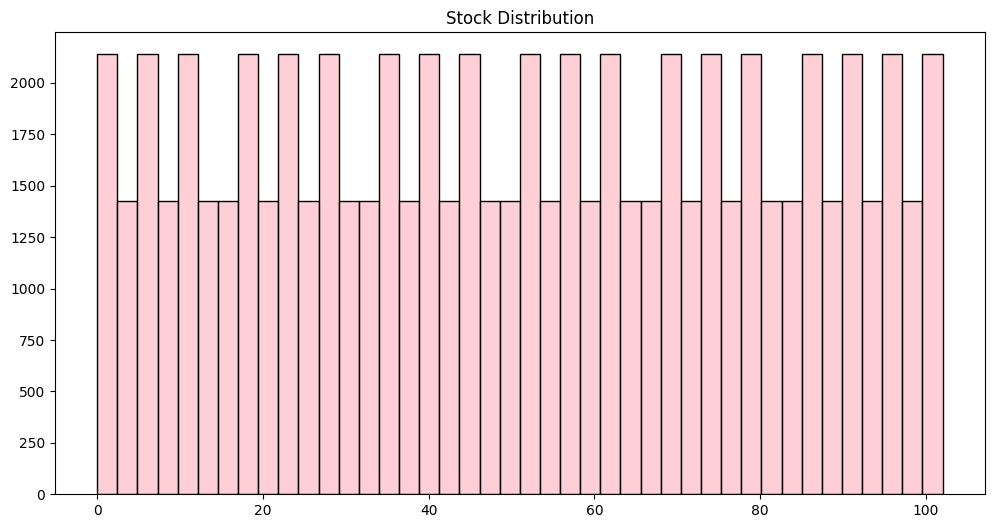

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Stock'], color= 'pink')
plt.title('Stock Distribution')
plt.xlabel('')
plt.ylabel('')
plt.show()

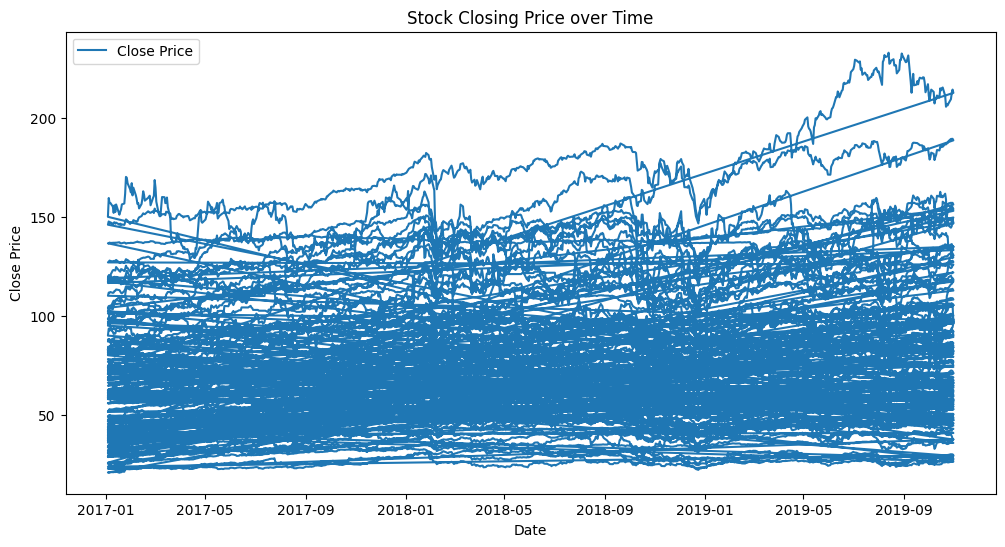

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label= 'Close Price')
plt.title('Stock Closing Price over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [10]:
df['Prediction'] = df['Close'].shift(-1)
x = df[['Close']].values[:-1]
y = df['Prediction'].values[:-1]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("r2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 4.727570401683146
r2 Score: 0.9956760570599071


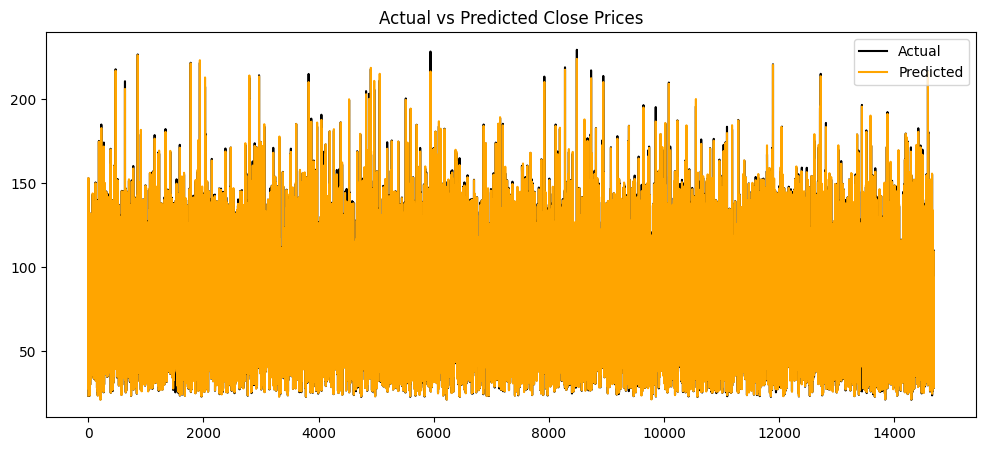

In [13]:
plt.figure(figsize=(12,5))
plt.plot(y_test, label='Actual', color= "black")
plt.plot(y_pred, label='Predicted', color= "orange")
plt.title('Actual vs Predicted Close Prices')
plt.legend()
plt.show()

In [14]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 4.727570401683146
R² Score: 0.9956760570599071


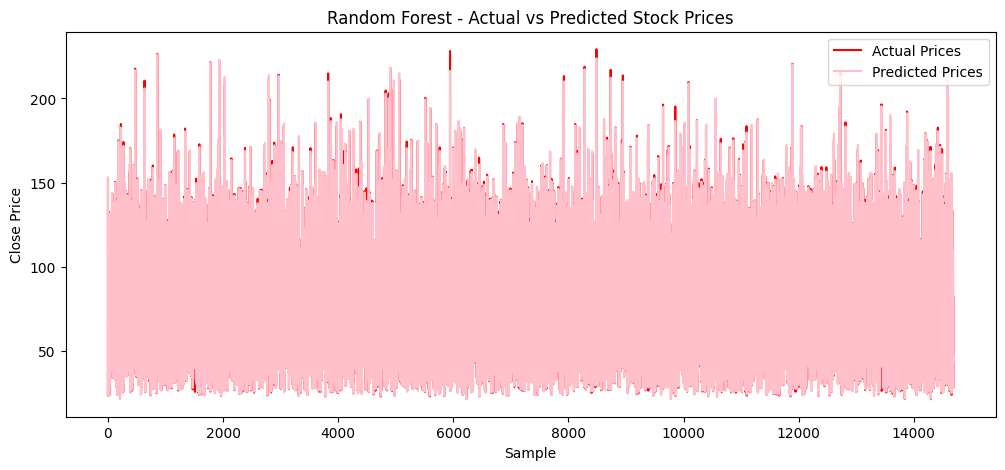

In [16]:
plt.figure(figsize=(12,5))
plt.plot(y_test, label='Actual Prices', color='red')
plt.plot(y_pred, label='Predicted Prices', color='pink')
plt.title("Random Forest - Actual vs Predicted Stock Prices")
plt.xlabel("Sample")
plt.ylabel("Close Price")
plt.legend()
plt.show()


In [17]:
latest_close = df[['Close']].values[-1].reshape(1,-1)
future_price = model.predict(latest_close)
print(f"Predicted Price for next day: ₹{future_price[0]:.2f}")

Predicted Price for next day: ₹130.62
